***

<img src="assets/label_detection_cover.png" width="100%">
    
***

# Label Detection with Python, Google Vision API and google-vision-wrapper

### Introduction
In this quick tutorial we are going to show how to use google-vision-wrapper to perform label detection on images. Please refer to the [Official Github Page](https://github.com/gcgrossi/google-vision-wrapper) for more information.

### Before you begin
Before starting, it is mandatory to correctly setup a Google Cloud Project, authorise the Google Vision API and generate a .json API key file. Be sure to have fulfilled all the steps in the [Before you Begin Guide](https://cloud.google.com/vision/docs/before-you-begin) before moving on.

### Imports

In [2]:
# the main class
from gvision import GVisionAPI

#other imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read The input image
You can read the input image in the way you prefer, the class accepts 2 formats:
1. numpy.ndarray
2. bytes

The Google Vision API accepts images in bytes format. If you chose to go on with numpy array the wrapper will perform the conversion. I always chose to read the image using OpenCV.

In [3]:
#read the image from disk
img = cv2.imread(os.path.join(os.getcwd(),'images','barad-dur.png'))

we are going to use this image: 

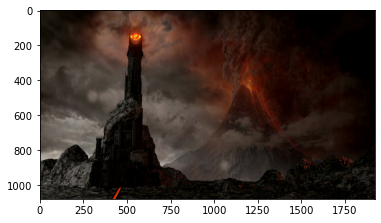

In [4]:
#show the image
#transform to RGB -> an OpenCV speciality
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

The Barad-Dur Tower, home of the dark Lord Sauron, along with Mount Doom. According to Boromir's description:
> _it is a barren wasteland, riddled with fire and ash and dust, the very air you breathe is a poisonous fume_.

Let's see if Google Vision API is able to detect some of those characteristics

### Initialize the class
```authfile``` is the path to your API key file in .json format.

In [5]:
# path to auth key file
authfile = os.path.join(os.getcwd(),'gvision_auth.json')
gvision = GVisionAPI(authfile)

### Perform a request
The method we are goin to use is: ```.perform_request(img,option)```. It accepts 2 parameters:
1. the image already loaded
2. an option that specifies what kind of request to make

You can access the possibile options in this two ways:

In [6]:
# method to print request options
gvision.request_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.request_types)

Possible Request Options: 
* face detection
* landmark detection
* logo detection
* object detection
* label detection
* image properties
* text detection
* handwriting detection
* web detection

Possible Options:
dict_keys(['face detection', 'landmark detection', 'logo detection', 'object detection', 'label detection', 'image properties', 'text detection', 'handwriting detection', 'web detection'])


We are ready to perform the actual request. The body of the response from the API can be accessed using the  ```.response``` attribute.

In [7]:
#perform a request to the API
gvision.perform_request(img,'label detection')

# print the response
print(gvision.response)

label_annotations {
  mid: "/m/0csby"
  description: "Cloud"
  score: 0.96949613
  topicality: 0.96949613
}
label_annotations {
  mid: "/m/01ctsf"
  description: "Atmosphere"
  score: 0.9481808
  topicality: 0.9481808
}
label_annotations {
  mid: "/m/01bqvp"
  description: "Sky"
  score: 0.92793596
  topicality: 0.92793596
}
label_annotations {
  mid: "/m/09nm_"
  description: "World"
  score: 0.8751534
  topicality: 0.8751534
}
label_annotations {
  mid: "/m/01fdzj"
  description: "Tower"
  score: 0.8382295
  topicality: 0.8382295
}
label_annotations {
  mid: "/m/07pw27b"
  description: "Atmospheric phenomenon"
  score: 0.8210943
  topicality: 0.8210943
}
label_annotations {
  mid: "/m/04h7h"
  description: "Lighthouse"
  score: 0.81161225
  topicality: 0.81161225
}
label_annotations {
  mid: "/m/07sn5gn"
  description: "Geological phenomenon"
  score: 0.7721946
  topicality: 0.7721946
}
label_annotations {
  mid: "/m/066xq"
  description: "Pollution"
  score: 0.7613506
  topicality: 

And it is quite verbose. 

### Obtaining the information as list
The information regarding object detection can be accessed using different methods. In the following, we are going to obtain all the label annotations.

In [8]:
# obtaining lists 
headers,labels = gvision.labels()
print(headers)
print(labels)

['DESCRIPTION', 'SCORE', 'TOPICALITY']
[['Cloud', 0.9694961309432983, 0.9694961309432983], ['Atmosphere', 0.9481807947158813, 0.9481807947158813], ['Sky', 0.9279359579086304, 0.9279359579086304], ['World', 0.8751534223556519, 0.8751534223556519], ['Tower', 0.8382294774055481, 0.8382294774055481], ['Atmospheric phenomenon', 0.821094274520874, 0.821094274520874], ['Lighthouse', 0.8116122484207153, 0.8116122484207153], ['Geological phenomenon', 0.7721946239471436, 0.7721946239471436], ['Pollution', 0.7613505721092224, 0.7613505721092224], ['Landscape', 0.735795259475708, 0.735795259475708]]


Remember: for each label detected (there could be more than 1) a list with the corresponding information is filled. I.e. the first label is ```labels[0]```. As you can see, each list contains the object name, the detection confidence and the topicality.

### Obtaining the information as pandas DataFrame
the same information can also de retrieved as a pandas DataFrame for convenience, using the method ```.to_df(option,name)```. It accepts 2 parameters:
1. an option, specifying the type of information to dump
2. the optional name or id of the image, that will be appended to each row of the DataFrame. Default is set to ```'image'```.

You can access the possible options in the two following ways:

In [9]:
# method to print df options
gvision.df_options()

#request options from the class attribute
print('\nPossible Options:')
print(gvision.df_types)

Possible DataFrame Options: 
* face landmarks
* face
* head
* angles
* objects
* landmarks
* logo
* labels
* colors
* crop hints
* texts
* pages
* blocks
* paragraphs
* words
* symbols
* web entities
* matching images
* similar images

Possible Options:
dict_keys(['face landmarks', 'face', 'head', 'angles', 'objects', 'landmarks', 'logo', 'labels', 'colors', 'crop hints', 'texts', 'pages', 'blocks', 'paragraphs', 'words', 'symbols', 'web entities', 'matching images', 'similar images'])


Let's obtain the information.

In [10]:
# obtain the information as a pandas DataFrame
df_labels  =gvision.to_df('labels','barad-dur')
df_labels

,IMAGE_NAME,DESCRIPTION,SCORE,TOPICALITY
0,barad-dur,Cloud,0.969496,0.969496
1,barad-dur,Atmosphere,0.948181,0.948181
2,barad-dur,Sky,0.927936,0.927936
3,barad-dur,World,0.875153,0.875153
4,barad-dur,Tower,0.838229,0.838229
5,barad-dur,Atmospheric phenomenon,0.821094,0.821094
6,barad-dur,Lighthouse,0.811612,0.811612
7,barad-dur,Geological phenomenon,0.772195,0.772195
8,barad-dur,Pollution,0.761351,0.761351
9,barad-dur,Landscape,0.735795,0.735795


### Draw the results
You can now draw the results in the way you prefer. I will do it using OpenCV.

True

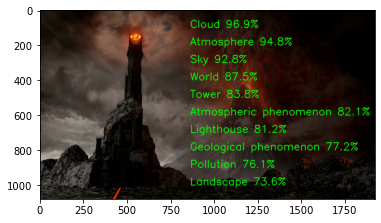

In [11]:
#copy the original image
#transform to RGB -> an OpenCV speciality
labelled = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

# set starting point to draw
# the labels
h,w = 0,labelled.shape[1]
for l in labels:
    
    # increase y coordinate
    h+=100
    
    # get label and confidence
    label = l[0]
    score = l[1]*100
    
    # draw label and confidence
    cv2.putText(labelled, "{} {:.1f}%".format(label,score), (int(w/2)-100, int(h)), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 0), 3)
    
#show the image
plt.imshow(labelled)

# save to disk
output = cv2.cvtColor(labelled, cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join(os.getcwd(),'assets','output_baraddur.jpg'), output)

Apart from some slightly off outcomes, it seems the labels detected are pretty much in line with Boromir's description! 

Even Google Vision API knows that:
>_**One does not simply walk into Mordor**_

<image src="assets/face_detection_cover.png" width="50%">